Acknowledgement: I have referred to the official documentation of Astropy to understand and use different functions in the library. 

In [2]:
#1st question
from astropy import units as u
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time

CygA_J2000=SkyCoord(ra='19h59m28.3566s',dec='40d44m02.096s', frame=FK5())
print(CygA_J2000.ra.to(u.hourangle), CygA_J2000.dec.to(u.deg))


CygA_today=CygA_J2000.transform_to(FK5(equinox=Time.now()))
print(CygA_today.ra.to(u.hourangle), CygA_today.dec.to(u.deg))

19h59m28.3566s 40d44m02.096s
20h00m22.43998492s 40d48m22.85580405s


The RA and Dec values of a source would be different today compared to its values in J2000 because of the precession of the Earth's axis. The expansion of the universe will also cause proper motion of the source but its effect will be negligible due to the small time scale.

In this code, I have started by assigning the coordinates given in the question to Cygnus A. Then, I have changed the equinox time to the current time, so that the RA and Dec are taken considering the Earth's orientation today. This gives the coordinates of Cygnus A for today.

In [ ]:
#2nd question
from astropy import units as u
from astropy.coordinates import SkyCoord, FK5 , EarthLocation , AltAz
from astropy.time import Time

iitk = EarthLocation.of_address('IIT Kanpur')
CygA = SkyCoord(ra='19h59m28.3566s',dec='40d44m02.096s', frame=FK5())
position = CygA.transform_to(AltAz(obstime=Time.now(), location = iitk))

print(position.alt.to(u.hourangle) , position.az.to(u.deg))

-1h05m38.38979516s 335d15m09.06346513s


In this code, I have obtained the coordinates of IITK using EarthLocation and taken the RA and Dec of Cygnus A as mentioned previously. To get the coordinates of the source in terms of elevation and azimuth with respect to IITK, I used the transform_to function to change the coordinate system to Alt-Az and specified the observation time as the current time and the reference location as IITK.

<function matplotlib.pyplot.show(close=None, block=None)>

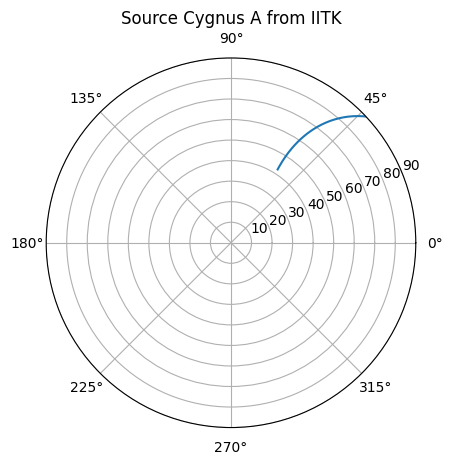

In [2]:
#3rd question
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, FK5

CygA_J2000=SkyCoord(ra='19h59m28.3566s',dec='40d44m02.096s', frame=FK5())
iitk = EarthLocation.of_address('IIT Kanpur')

t0 = Time.now()
times = t0 + np.linspace(0,12,200) *u.hour

altaz = CygA_J2000.transform_to(AltAz(obstime=times,location=iitk))

az = altaz.az.to(u.rad).value
el = altaz.alt.to(u.deg).value

radius = 90 - el

plt.figure
plt.polar(az,radius)
plt.ylim(0,90)
plt.title("Source Cygnus A from IITK")
plt.show

In this code, I have used the same method to change the coordinate system from RA and Dec to Alt-Az but the only difference is that instead of one set of coordinates of the source,I made an array of the coordinates corresponding to different times of the day.Then, I converted the elevation to polar radius by subtracting it from 90 degrees. This gives us the zenith distance. Then I plotted the azimuth and radius.

The plot obtained is not a full circle which shows that the source was below the horizon for part of the day.


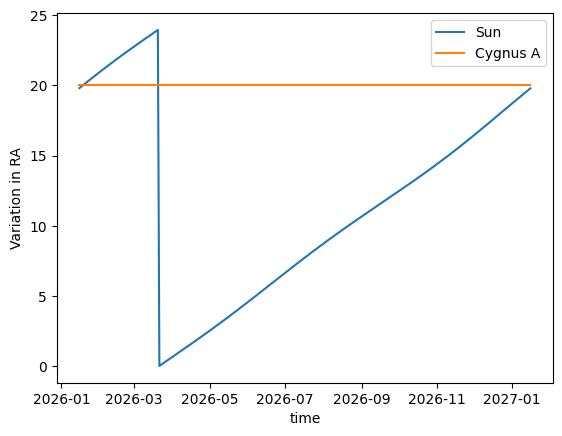

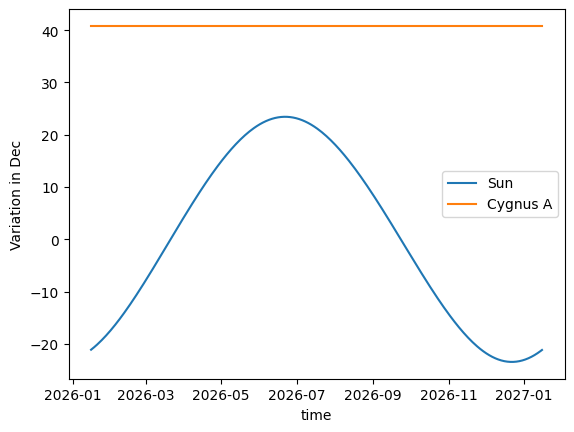

In [3]:
import numpy as np
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, get_sun, FK5
import matplotlib.pyplot as plt

t0 = Time.now()
times = t0 + np.linspace(0,365,300) * u.day

sun = get_sun(times)
sun_ra= sun.ra.to(u.hourangle).value
sun_dec= sun.dec.to(u.deg).value

CygA_J2000=SkyCoord(ra='19h59m28.3566s',dec='40d44m02.096s', frame=FK5())
CygA = CygA_J2000.transform_to(FK5(equinox=times))
CygA_ra=CygA.ra.to(u.hourangle).value
CygA_dec=CygA.dec.to(u.deg).value

plt.Figure
plt.plot(times.datetime,sun_ra,label="Sun")
plt.plot(times.datetime,CygA_ra,label="Cygnus A")
plt.xlabel("time")
plt.ylabel("Variation in RA")
plt.legend()
plt.show()

plt.Figure
plt.plot(times.datetime , sun_dec,label="Sun")
plt.plot(times.datetime , CygA_dec ,label="Cygnus A")
plt.xlabel("time")
plt.ylabel("Variation in Dec")
plt.legend()
plt.show()




In this code, I have used the get_sun function to obtain the coordinates of the Sun at different times of the year.The coordinates of Cygnus A at different times of the year are obtained in the same method used in previous questions. Then, the RA and Dec of the Sun and Cygnus A were plotted against time.

From the graphs we can see that RA and Dec of the Sun varies significantly while that of Cygnus A remains almost constant. The siginificant variation in the RA and Dec of the Sun is due to the orbital motion of the Earth around the Sun which makes the Sun appear to be moving along the ecliptic. The RA of the Sun has a sharp decrease this is because of the periodicity of RA, when it reaches 24h it wraps back to 0h causing a discontinuity.
